In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
#load burglary points
bg = pd.read_csv('data/burg_pts_2017.csv')
# load socio data
socio = pd.read_csv('data/socio.csv')

In [3]:
bg.head()

,Unnamed: 0,Latitude,Longitude
0,5285383,40.828142,-73.941772
1,5285426,40.723869,-73.900987
2,5285496,40.834503,-73.913373
3,5285646,40.755100,-73.833253
4,5285660,40.689600,-73.849719


In [4]:
bg.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
# assign spatial attribute to burglary
bg['geometry'] = bg.apply(lambda z: Point(z.Longitude, z.Latitude), axis=1)
bg = gpd.GeoDataFrame(bg)

In [6]:
# assign projection to burglary
bg.crs = {'init': 'epsg:4326'}

In [7]:
# open shape file, downloaded from Census Reporter
mp = gpd.read_file('shape/New_York/new_york.shp')

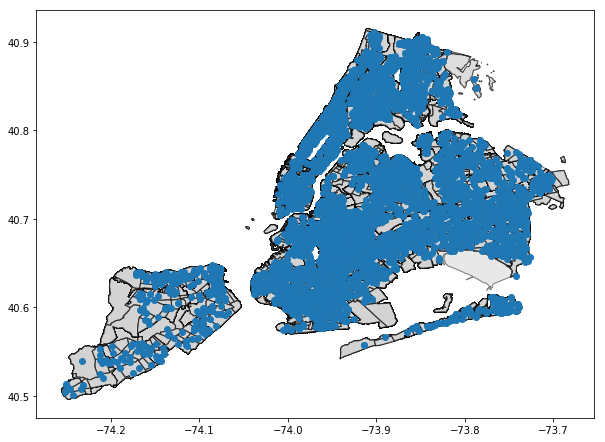

In [9]:
# plotting New York map & burglary
fig, ax = plt.subplots(figsize = (10,10))
mp.plot(color='lightgrey',
                      edgecolor = 'black',
                      ax = ax,
                      alpha=.5)
bg.plot(ax=ax)
plt.savefig('images/Burglary_map.jpg')

In [45]:
# add attribute of census tract location to burglary
bg = gpd.sjoin(bg, mp, how="inner", op="within")

In [16]:
bg.head()

,Latitude,Longitude,geometry,index_right,geoid_1,name_1,geoid_2,name_2,B01003001,B01003001e,index_righ
0,40.828142,-73.941772,POINT (-73.941771539 40.828141885),54848,14000US36061023501,"Census Tract 235.01, New York, NY",86000US10031,10031,62382.0,2096.0,421152
3081,40.828773,-73.941312,POINT (-73.94131208100001 40.828772936),54848,14000US36061023501,"Census Tract 235.01, New York, NY",86000US10031,10031,62382.0,2096.0,421152
4655,40.828773,-73.941312,POINT (-73.94131208100001 40.828772936),54848,14000US36061023501,"Census Tract 235.01, New York, NY",86000US10031,10031,62382.0,2096.0,421152
0,40.828142,-73.941772,POINT (-73.941771539 40.828141885),54860,14000US36061023501,"Census Tract 235.01, New York, NY",86000US10031,10031,62382.0,2096.0,170633
3081,40.828773,-73.941312,POINT (-73.94131208100001 40.828772936),54860,14000US36061023501,"Census Tract 235.01, New York, NY",86000US10031,10031,62382.0,2096.0,170633


In [46]:
# aggregate burglary to census tract level
ct = pd.DataFrame(bg['name_1'].value_counts()).reset_index()


In [47]:
ct.head()

,index,name_1
0,"Census Tract 545, Queens, NY",4992
1,"Census Tract 413, Kings, NY",4244
2,"Census Tract 441, Kings, NY",4088
3,"Census Tract 189, Bronx, NY",3472
4,"Census Tract 547, Queens, NY",3432


In [48]:
ct.rename(columns={'index':'name', 'name_1':'burglary count'}, inplace=True)

In [36]:
ct.head()

,name,burglary count
0,"Census Tract 545, Queens, NY",4992
1,"Census Tract 413, Kings, NY",4244
2,"Census Tract 441, Kings, NY",4088
3,"Census Tract 189, Bronx, NY",3472
4,"Census Tract 547, Queens, NY",3432


In [49]:
#merge socio & burglury data
data = socio.merge(ct, on='name')
data.head()

,Unnamed: 0,geoid,name,pop,white,black,asian,over 15 under 65,Less than High School,High School Graduate,Bachelor or Higher,unemployment,Renter Occupied,income below Poverty,burglary count
0,1,14000US36005000200,"Census Tract 2, Bronx, NY",5058,2665,1233,158,1778,468,976,410,263,2421,1019,164
1,2,14000US36005000400,"Census Tract 4, Bronx, NY",5944,2616,1962,54,2146,259,704,1077,232,1362,428,328
2,4,14000US36005001900,"Census Tract 19, Bronx, NY",2817,519,1054,78,953,355,426,420,200,2034,684,2835
3,5,14000US36005002000,"Census Tract 20, Bronx, NY",9608,3344,4500,104,2421,1711,1530,622,560,7879,3417,123
4,6,14000US36005002300,"Census Tract 23, Bronx, NY",4733,629,1915,0,1222,697,909,129,283,4712,1620,420


In [50]:
data.to_csv('data/census_tract_socio_burg.csv')